# ***Import*** ***Libraries***

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew 
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier  
import time

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import log_loss


# **Dataset for Analysis**

In [ ]:
df = pd.read_csv('NiVDSamples - Copy.csv')
df.head()

,Age,Sex,Incubation,illness_duration,fever,altered_sensorium,headache,myalgia,cough,breathissue,...,seizure,HR,Bpsys,Bpdias,O2level,Platelets,Neutrophils,Lymphocyte,TotalWBC,RT_PCR_Result
0,27,1.0,NaN,3.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,90.0,110.0,60.0,96.0,8.8,NaN,NaN,6300.0,1
1,28,1.0,9.0,5.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,110.0,110.0,70.0,78.0,11.0,NaN,NaN,4300.0,0
2,45,1.0,9.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,106.0,150.0,90.0,96.0,19.0,NaN,NaN,8800.0,0
3,100,1.0,11.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,110.0,190.0,100.0,60.0,18.1,NaN,NaN,8900.0,1
4,59,1.0,11.0,9.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,120.0,110.0,70.0,86.0,12.2,NaN,NaN,4600.0,1


# ***Data Preprocessing***

**Check Null Values**

In [ ]:
df.isnull().sum()

Age                   0
Sex                   1
Incubation           22
illness_duration     21
fever                 9
altered_sensorium    51
headache             10
myalgia              24
cough                10
breathissue          11
vomit                12
seizure              11
HR                   43
Bpsys                43
Bpdias               43
O2level              41
Platelets            45
Neutrophils          68
Lymphocyte           68
TotalWBC             36
RT_PCR_Result         0
dtype: int64

**Fill Missing values using MEAN Values**

In [ ]:
df = df.fillna(df.mean())
df.head()

,Age,Sex,Incubation,illness_duration,fever,altered_sensorium,headache,myalgia,cough,breathissue,...,seizure,HR,Bpsys,Bpdias,O2level,Platelets,Neutrophils,Lymphocyte,TotalWBC,RT_PCR_Result
0,27,1.0,8.443548,3.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,90.0,110.0,60.0,96.0,8.8,58.005037,40.803846,6300.0,1
1,28,1.0,9.000000,5.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,110.0,110.0,70.0,78.0,11.0,58.005037,40.803846,4300.0,0
2,45,1.0,9.000000,2.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,106.0,150.0,90.0,96.0,19.0,58.005037,40.803846,8800.0,0
3,100,1.0,11.000000,2.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,110.0,190.0,100.0,60.0,18.1,58.005037,40.803846,8900.0,1
4,59,1.0,11.000000,9.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,120.0,110.0,70.0,86.0,12.2,58.005037,40.803846,4600.0,1


**Check, Data Skewness**

In [ ]:
df.skew(axis = 0, skipna = True)

Age                  0.605796
Sex                 -1.016902
Incubation           1.760817
illness_duration     2.007231
fever               -2.180879
altered_sensorium   -0.742629
headache            -0.279580
myalgia             -0.036245
cough                0.375385
breathissue         -0.330935
vomit                0.450712
seizure              1.249682
HR                   0.540903
Bpsys                1.771478
Bpdias               0.788017
O2level             -1.634159
Platelets            0.888103
Neutrophils         -1.781495
Lymphocyte          -0.366483
TotalWBC            -0.815807
RT_PCR_Result       -0.279459
dtype: float64

*`Positive skew is presented in the following attributes: **Age, Incubation, illness_duration, seizure, BP Systolic, BP diastolic, and Platelets**`*

**Skewed Data Visualization using distplot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

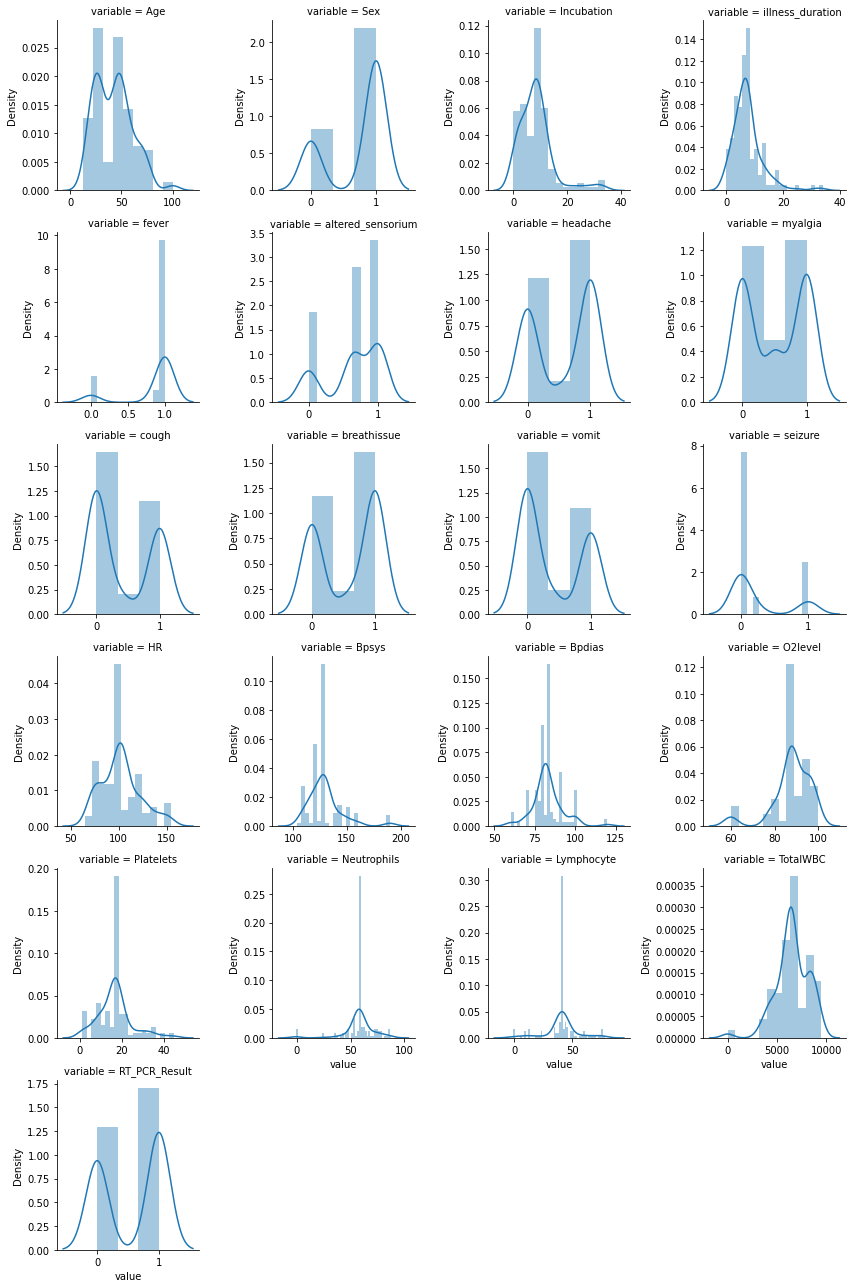

In [ ]:
#Histogram Representation of skewness

num_vars = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num_vars)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')

**Skew Correction using** *sqrt*

In [ ]:
df["Age"] = stats.boxcox(df["Age"])[0]
pd.Series(df["Age"]).skew()

df["Incubation"] = np.sqrt(df["Incubation"])
pd.Series(df["Incubation"]).skew()

df["illness_duration"] = np.sqrt(df["illness_duration"])
pd.Series(df["illness_duration"]).skew()

df["seizure"] = np.sqrt(df["seizure"])
pd.Series(df["seizure"]).skew()

df["Bpsys"] = np.sqrt(df["Bpsys"])
pd.Series(df["Bpsys"]).skew()

df["Bpdias"] = np.sqrt(df["Bpdias"])
pd.Series(df["Bpdias"]).skew()

df["Platelets"] = np.sqrt(df["Platelets"])
pd.Series(df["Platelets"]).skew()

-0.36678069798337665

**Skewness Reduced**

In [ ]:
df.skew()

Age                 -0.029148
Sex                 -1.016902
Incubation          -0.096312
illness_duration    -0.190812
fever               -2.180879
altered_sensorium   -0.742629
headache            -0.279580
myalgia             -0.036245
cough                0.375385
breathissue         -0.330935
vomit                0.450712
seizure              1.083095
HR                   0.540903
Bpsys                1.493784
Bpdias               0.427199
O2level             -1.634159
Platelets           -0.366781
Neutrophils         -1.781495
Lymphocyte          -0.366483
TotalWBC            -0.815807
RT_PCR_Result       -0.279459
dtype: float64

**Plot Visualization (Reduced Skewness)**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

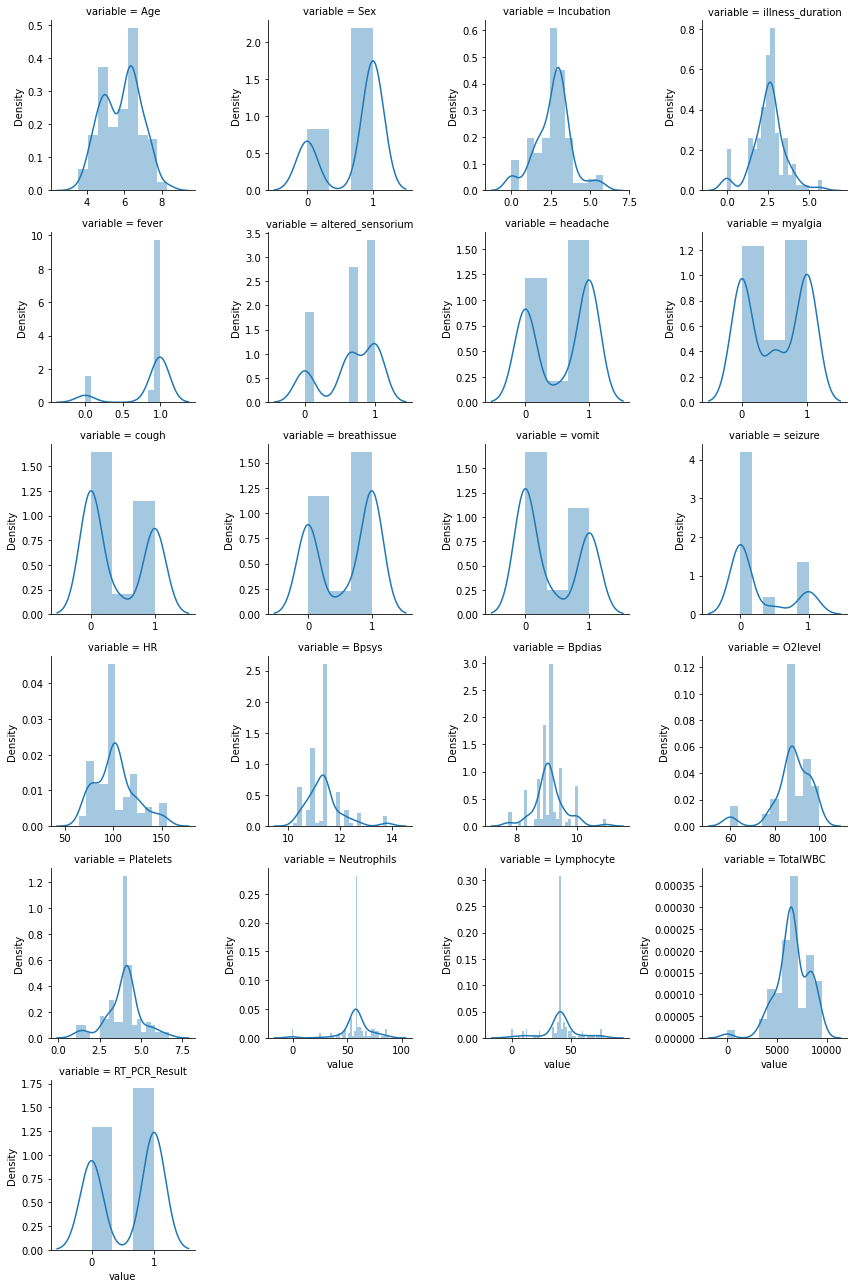

In [ ]:
num_vars = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num_vars)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')

# **Outlier Detection & Removal**


Detecting Outliers from the skewed features using **Box Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



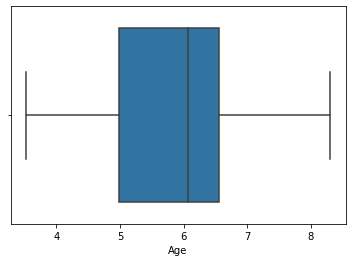

In [ ]:
#Form a Box-plot for the skewed feature
sns.boxplot(df['Age'])

No Outlier is detected...

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



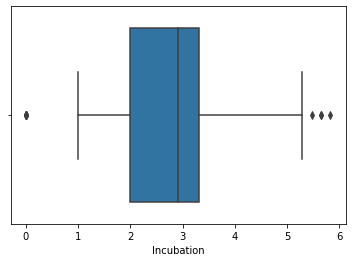

In [ ]:
sns.boxplot(df['Incubation'])

**Applying Inter-Quartile Range (IQR) to remove outliers**

5.2915619758884995
0.025062814466900285


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:

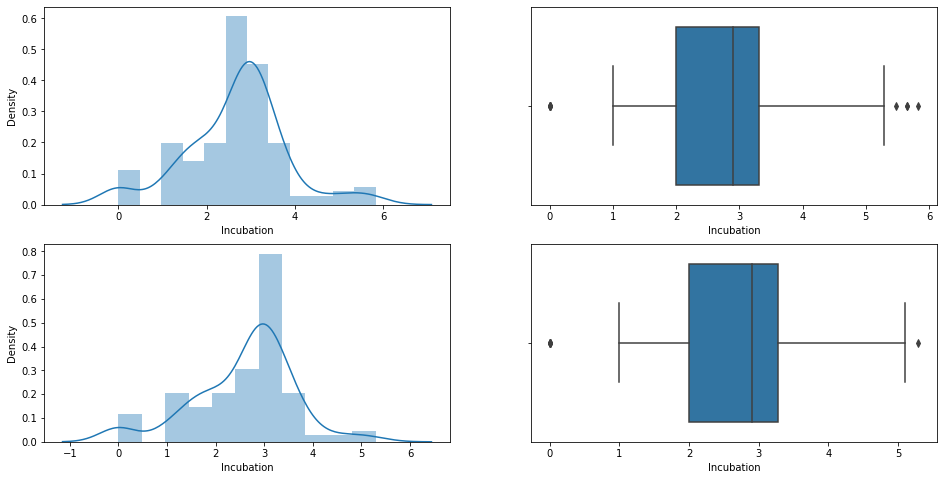

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:

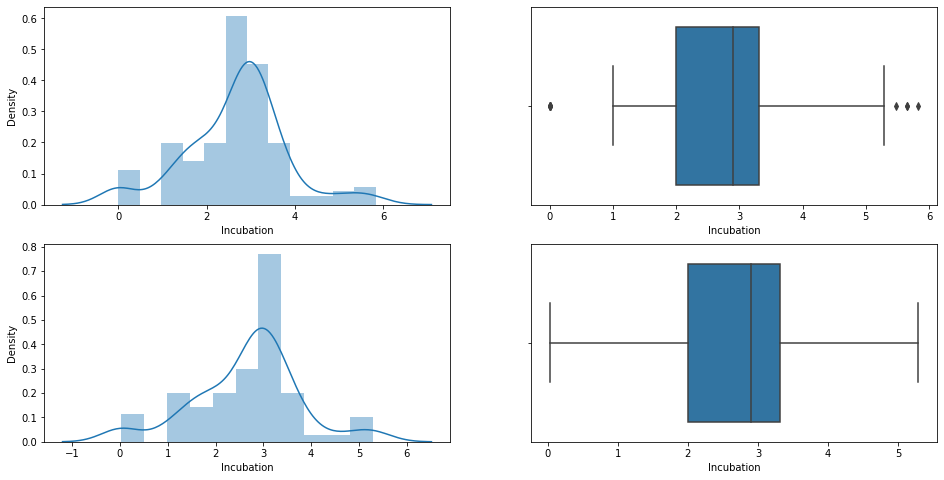

In [ ]:
#Finding the IQR

percentile25 = df['Incubation'].quantile(0.25)
percentile75 = df['Incubation'].quantile(0.75)

#Finding upper and lower limit

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print(upper_limit)
print(lower_limit)

#Finding Outliers

df[df['Incubation'] > upper_limit]
df[df['Incubation'] < lower_limit]

#Trimming

new_df = df[df['Incubation'] < upper_limit]
new_df.shape

#Compare the plots after trimming

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Incubation'])
plt.subplot(2,2,2)
sns.boxplot(df['Incubation'])
plt.subplot(2,2,3)
sns.distplot(new_df['Incubation'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Incubation'])
plt.show()

#Capping

new_df_cap = df.copy()
new_df_cap['Incubation'] = np.where(
    new_df_cap['Incubation'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Incubation'] < lower_limit,
        lower_limit,
        new_df_cap['Incubation']
    )
)

#Compare the plots after capping

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Incubation'])
plt.subplot(2,2,2)
sns.boxplot(df['Incubation'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['Incubation'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Incubation'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



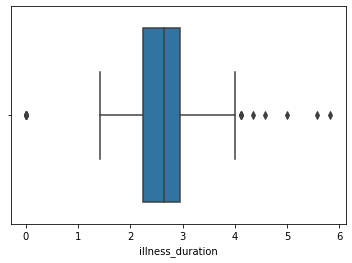

In [ ]:
sns.boxplot(df['illness_duration'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:

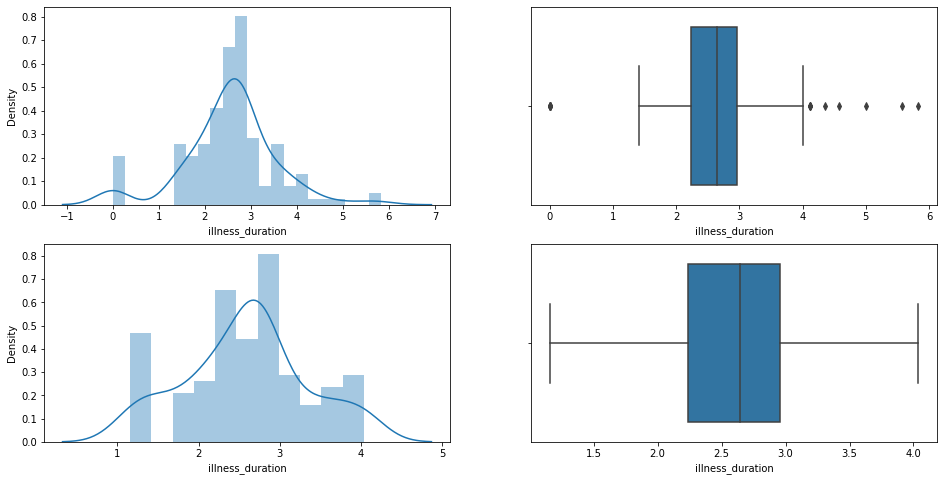

In [ ]:
#Finding the IQR

percentile25 = df['illness_duration'].quantile(0.25)
percentile75 = df['illness_duration'].quantile(0.75)

#Finding upper and lower limit

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

#Finding Outliers

df[df['illness_duration'] > upper_limit]
df[df['illness_duration'] < lower_limit]

#Trimming

new_df = df[df['illness_duration'] < upper_limit]
new_df.shape

#Capping

new_df_cap = df.copy()
new_df_cap['illness_duration'] = np.where(
    new_df_cap['illness_duration'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['illness_duration'] < lower_limit,
        lower_limit,
        new_df_cap['illness_duration']
    )
)

#Compare the plots after capping

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['illness_duration'])
plt.subplot(2,2,2)
sns.boxplot(df['illness_duration'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['illness_duration'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['illness_duration'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



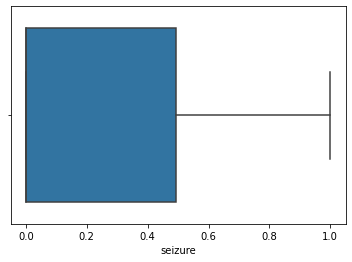

In [ ]:
sns.boxplot(df['seizure'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



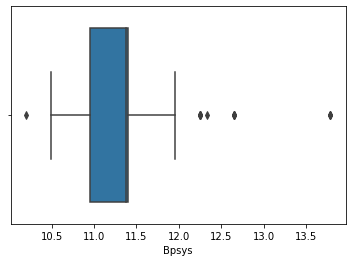

In [ ]:
sns.boxplot(df['Bpsys'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:

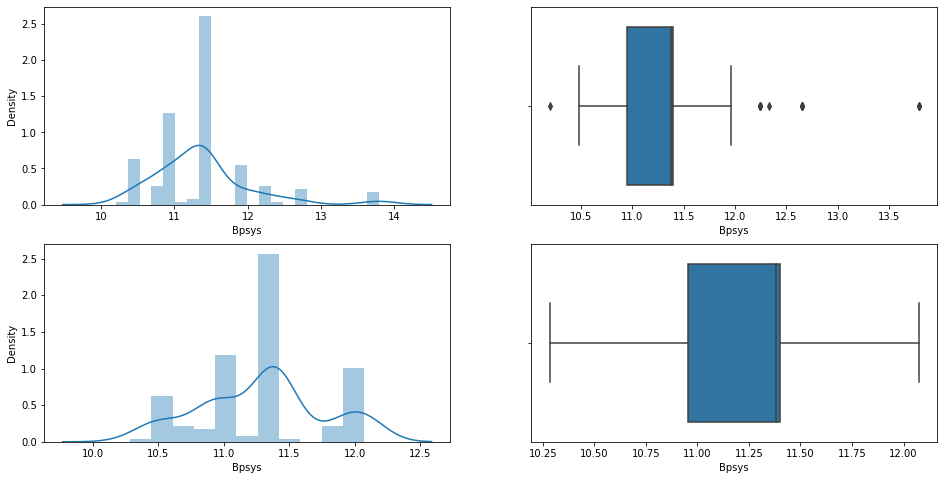

In [ ]:
#Finding the IQR

percentile25 = df['Bpsys'].quantile(0.25)
percentile75 = df['Bpsys'].quantile(0.75)

#Finding upper and lower limit

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

#Finding Outliers

df[df['Bpsys'] > upper_limit]
df[df['Bpsys'] < lower_limit]

#Trimming

new_df = df[df['Bpsys'] < upper_limit]
new_df.shape

#Capping

new_df_cap = df.copy()
new_df_cap['Bpsys'] = np.where(
    new_df_cap['Bpsys'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Bpsys'] < lower_limit,
        lower_limit,
        new_df_cap['Bpsys']
    )
)

#Compare the plots after capping

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Bpsys'])
plt.subplot(2,2,2)
sns.boxplot(df['Bpsys'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['Bpsys'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Bpsys'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



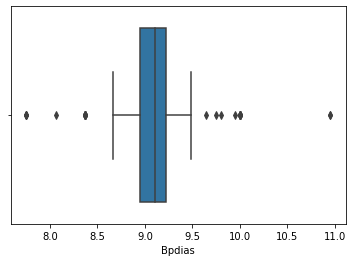

In [ ]:
sns.boxplot(df['Bpdias'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:

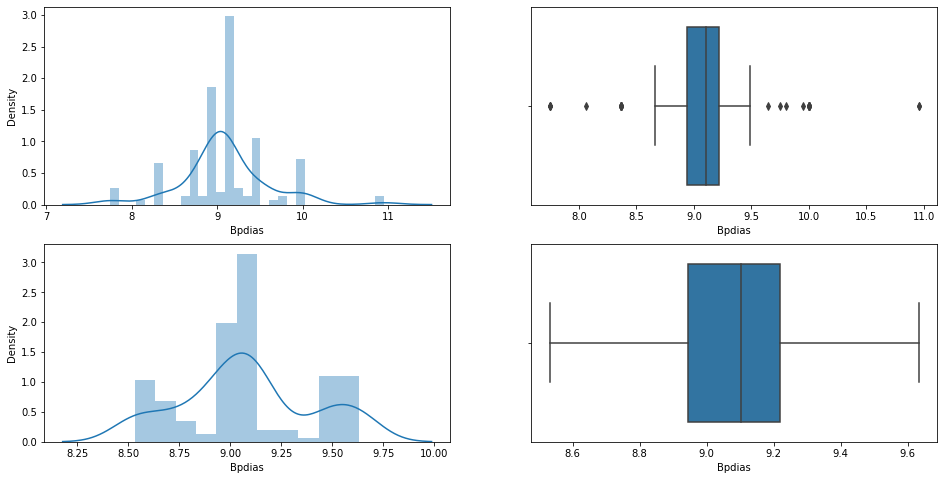

In [ ]:
#Finding the IQR

percentile25 = df['Bpdias'].quantile(0.25)
percentile75 = df['Bpdias'].quantile(0.75)

#Finding upper and lower limit

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

#Finding Outliers

df[df['Bpdias'] > upper_limit]
df[df['Bpdias'] < lower_limit]

#Trimming

new_df = df[df['Bpdias'] < upper_limit]
new_df.shape

#Capping

new_df_cap = df.copy()
new_df_cap['Bpdias'] = np.where(
    new_df_cap['Bpdias'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Bpdias'] < lower_limit,
        lower_limit,
        new_df_cap['Bpdias']
    )
)

#Compare the plots after capping

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Bpdias'])
plt.subplot(2,2,2)
sns.boxplot(df['Bpdias'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['Bpdias'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Bpdias'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



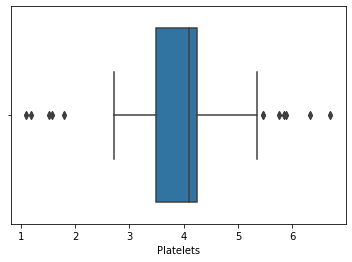

In [ ]:
sns.boxplot(df['Platelets'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:

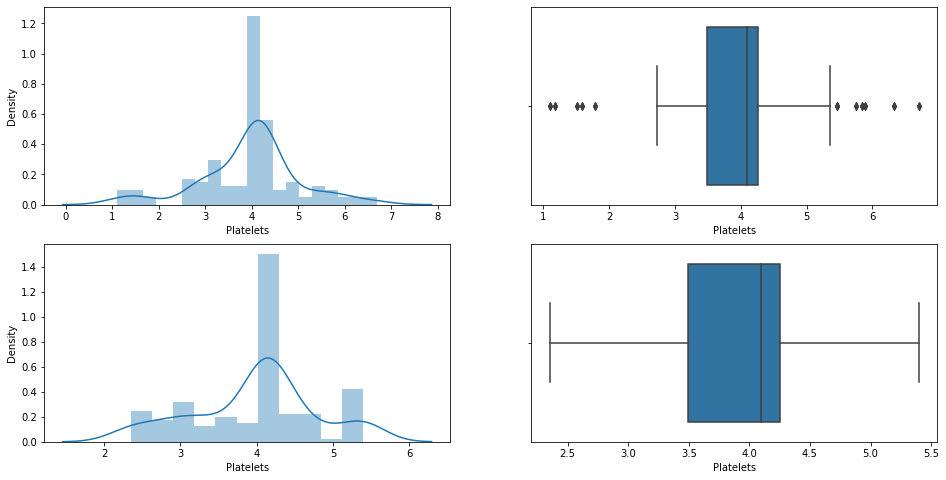

In [ ]:
#Finding the IQR

percentile25 = df['Platelets'].quantile(0.25)
percentile75 = df['Platelets'].quantile(0.75)

#Finding upper and lower limit

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

#Finding Outliers

df[df['Platelets'] > upper_limit]
df[df['Platelets'] < lower_limit]

#Trimming

new_df = df[df['Platelets'] < upper_limit]
new_df.shape

#Capping

new_df_cap = df.copy()
new_df_cap['Platelets'] = np.where(
    new_df_cap['Platelets'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Platelets'] < lower_limit,
        lower_limit,
        new_df_cap['Platelets']
    )
)

#Compare the plots after capping

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Platelets'])
plt.subplot(2,2,2)
sns.boxplot(df['Platelets'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['Platelets'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Platelets'])
plt.show()

# **Shape of the data samples Before & After Preprocessing ...**

In [ ]:
print('Before Preprocessing:', df.shape)

print('After Preprocessing:', new_df.shape)

Before Preprocessing: (146, 21)
After Preprocessing: (133, 21)


# **Feature Correlation Matrix (Heat Map)**

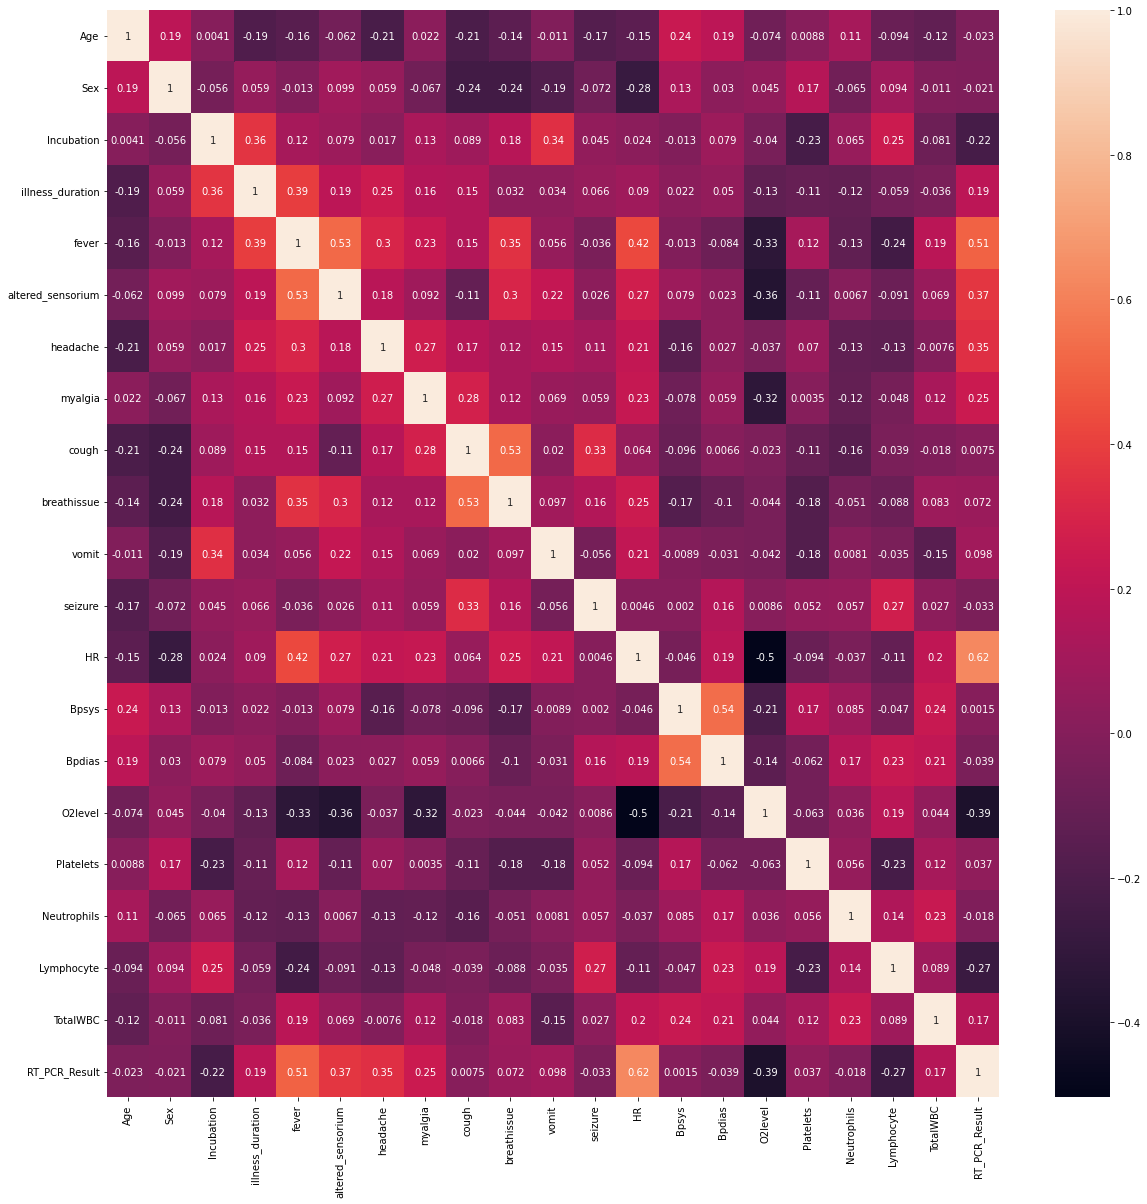

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(new_df.corr(), annot=True, ax = ax)
plt.show()

# **Class Balanced? or Imbalanced?**

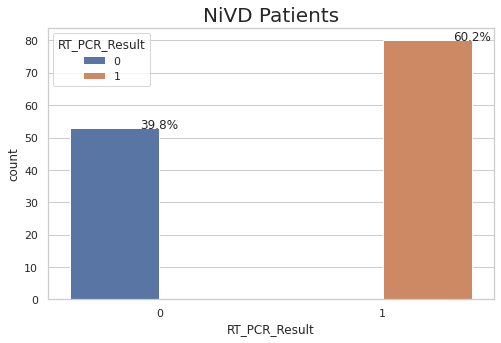

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(new_df))
ax = sns.countplot(x="RT_PCR_Result", hue="RT_PCR_Result", data=new_df)
plt.title('NiVD Patients', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    a = p.get_x() + p.get_width()
    b = p.get_height()
    ax.annotate(percentage, (a, b),ha='center')
plt.show()

# **Splitting Dependent & Independet variables**

In [ ]:
#Train-Test Split

X = new_df[list(new_df.columns)[:-1]]
y = new_df['RT_PCR_Result']

**Describe** **Data**

In [ ]:
new_df.describe()

,Age,Sex,Incubation,illness_duration,fever,altered_sensorium,headache,myalgia,cough,breathissue,...,seizure,HR,Bpsys,Bpdias,O2level,Platelets,Neutrophils,Lymphocyte,TotalWBC,RT_PCR_Result
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,...,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,5.876565,0.757324,2.661886,2.572376,0.859448,0.640443,0.589452,0.520030,0.409553,0.571763,...,0.274142,102.395956,11.363729,9.096431,87.584246,3.768931,58.381431,40.444043,6571.966507,0.601504
std,0.996865,0.428559,1.120044,0.978911,0.342327,0.387550,0.482356,0.462192,0.482329,0.483496,...,0.432712,20.667938,0.644275,0.498048,8.954863,0.876514,14.087499,14.439783,1646.944593,0.491440
min,3.519914,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,64.500000,10.488088,7.745967,60.000000,1.095445,-1.000000,-1.000000,-1.000000,0.000000
25%,5.056224,1.000000,2.000000,2.236068,1.000000,0.642105,0.000000,0.000000,0.000000,0.000000,...,0.000000,90.000000,10.954451,8.944272,86.000000,3.316625,58.005037,40.803846,5900.000000,0.000000
50%,6.099744,1.000000,2.905778,2.645751,1.000000,0.642105,1.000000,0.508197,0.000000,1.000000,...,0.000000,101.980583,11.381726,9.102971,88.019048,4.099746,58.005037,40.803846,6551.181818,1.000000
75%,6.514363,1.000000,3.316625,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.494413,110.000000,11.401754,9.273618,94.000000,4.242641,60.000000,43.000000,8200.000000,1.000000
max,8.303392,1.000000,5.656854,5.830952,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,155.000000,13.784049,10.954451,100.000000,5.357238,88.000000,78.000000,9500.000000,1.000000


**Feature Scaling using Min-Max Normalization**

               0           1           2           3           4           5   \
count  133.000000  133.000000  133.000000  133.000000  133.000000  133.000000   
mean     0.492665    0.757324    0.470559    0.441159    0.859448    0.640443   
std      0.208397    0.428559    0.197998    0.167882    0.342327    0.387550   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.321170    1.000000    0.353553    0.383482    1.000000    0.642105   
50%      0.539321    1.000000    0.513674    0.453743    1.000000    0.642105   
75%      0.625998    1.000000    0.586302    0.514496    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               6           7           8           9           10          11  \
count  133.000000  133.000000  133.000000  133.000000  133.000000  133.000000   
mean     0.589452    0.520030    0.409553    0.571763    0.399731    0.274142   
std      0.482356    0.4621

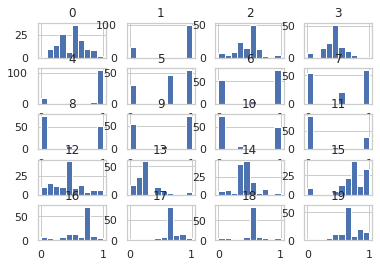

In [ ]:
# perform a robust scaler transform of the dataset
trans = preprocessing.MinMaxScaler()
data = trans.fit_transform(X)
# convert the array back to a dataframe
dataset = pd.DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
dataset.hist()
plt.show()

# **Dataset [70:30] Split-Up: Training (70%) & Testing (30%)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.3, random_state=10)

**Shape of Training & Testing Samples**

In [ ]:
print("Total number of samples in the dataset = ", new_df.shape)
print("Number of training samples = ",X_train.shape[0])
print("Number of testing samples", X_test.shape[0])
print("\n")
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

Total number of samples in the dataset =  (133, 21)
Number of training samples =  93
Number of testing samples 40


X_train Shape: (93, 20)
X_test Shape: (40, 20)
y_train Shape: (93,)
y_test Shape: (40,)


# **Model Building...**

**SUPPORT VECTOR MACHINE**

In [ ]:
#Create a svm Classifier
SVM_clf = svm.SVC(kernel='linear', probability=True) # Linear Kernel

#Train the model using the training sets
SVM_clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = SVM_clf.predict(X_test)

y_pred

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

#Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

#F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.875
Precision: 0.9166666666666666
Recall: 0.88
F1 Score: 0.8979591836734694


**MULTILAYER PERCEPTRON (MLP)**

In [ ]:
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)

#Fitting the training data to the network
classifier.fit(X_train, y_train)

#Predicting y for X_val
y_pred = classifier.predict(X_test)
y_pred

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

#Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

#F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.925
Precision: 1.0
Recall: 0.88
F1 Score: 0.9361702127659575


**K-NEAREST NEIGHBORS**

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

#Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

#F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8
Precision: 0.8695652173913043
Recall: 0.8
F1 Score: 0.8333333333333333


**DECISION TREE**

In [ ]:
#Fitting Decision Tree classifier to the training set  
dt_classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
dt_classifier.fit(X_train, y_train)  

#Predicting the test set result  
y_pred= dt_classifier.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

#Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

#F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.975
Precision: 0.9615384615384616
Recall: 1.0
F1 Score: 0.9803921568627451


**HYBRID CLASSIFIER: (SVM, MLP, KNN, and DT) and Model Performance**



In [ ]:
#st=time.time()
#Level 1 Training
estimator_list = [('SVC',SVM_clf), ('MLP',classifier), ('KNN',model), ('DecisionTree',dt_classifier)]

#Level 2 Training (Meta Classifier)
meta_classifier = LogisticRegression()

#Define Stacking Ensemble
final_model = StackingClassifier(estimators=estimator_list, final_estimator=meta_classifier, cv=10)

st=time.time()
final_model.fit(X_train, y_train)
et = time.time()
elapsed_time = (et-st)
print(f"Elapsed Time:",elapsed_time, 'seconds')
print("\n")

#Make Predictions
y_pred = final_model.predict(X_test)
y_pred

# wait for 3 seconds
#time.sleep(3)
#print('Sum of first 1 million numbers is:', sum_x)

# get the end time
#et = time.time()

# get the execution time
#elapsed_time = et - st
#print('Execution time:', elapsed_time, 'seconds')

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

#Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

#F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Elapsed Time: 5.078453540802002 seconds


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


# **Proposed Model**

***Create Pipeline with Restricted Boltzmann Machine & Hybrid Classifier***

In [ ]:
# Models we will use
#decision_tree = DecisionTreeClassifier()
rbm = BernoulliRBM(learning_rate=0.06, n_iter=500, random_state=0, verbose=True)

rbm_classifier = Pipeline(steps=[('rbm', rbm), ('Stacking Classifier', final_model)])

In [ ]:
momentum_coefficient = 0.5 
weight_decay = 1e-4

rbm.n_components = 100
final_model.C = 6000.0

***Training RBM-Hybrid Classifier Pipeline***

In [ ]:
# Training RBM-Logistic Pipeline

st=time.time()

rbm_classifier.fit(X_train, y_train)

et = time.time()
elapsed_time = (et-st)
print(f"Elapsed Time:",elapsed_time, 'seconds')
print("\n")

[BernoulliRBM] Iteration 1, pseudo-likelihood = -18.97, time = 0.01s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -17.58, time = 0.01s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -17.71, time = 0.00s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -16.57, time = 0.00s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -16.62, time = 0.00s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -15.98, time = 0.00s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -15.07, time = 0.00s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -15.46, time = 0.00s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -15.02, time = 0.00s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -14.64, time = 0.00s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -15.00, time = 0.00s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -14.45, time = 0.00s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -14.70, time = 0.00s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -14.38, time = 0.00s
[BernoulliRBM] Iteration 15, 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

Elapsed Time: 13.421031951904297 seconds




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



***Training Logistic Classifier***

In [ ]:
# Training Logistic regression

logistic_classifier = linear_model.LogisticRegression(C=100.0)
logistic_classifier.fit(X_train, y_train)

#rbm_final_prediction = rbm_classifier.predict(X_test)
#rbm_final_prediction

LogisticRegression(C=100.0)

# **Performance Analysis of Proposed eRBM**

In [ ]:
#pred=classifier.predict(X_test)
#pred

# Make predictions
y_rbm_train_pred = rbm_classifier.predict(X_train)
y_rbm_test_pred = rbm_classifier.predict(X_test)

# Training set performance
print('Training Accuracy')
rbm_train_accuracy = accuracy_score(y_train, y_rbm_train_pred) # Calculate Accuracy
print(rbm_train_accuracy)


print('Testing Accuracy')
rbm_test_accuracy = accuracy_score(y_test, y_rbm_test_pred) # Calculate Accuracy
print(rbm_test_accuracy)
rbm_precision = metrics.precision_score(y_test, y_rbm_test_pred)
#print(rbm_precision)
rbm_recall = metrics.recall_score(y_test, y_rbm_test_pred)
#print(rbm_recall)
rbm_f1 = metrics.f1_score(y_test, y_rbm_test_pred)
#print(rbm_f1)

Training Accuracy
0.9247311827956989
Testing Accuracy
0.875


# **eRBM Classification Report**

In [ ]:
# Evaluation

print()
print("Stacking Ensemble Classifier using RBM features:\n%s\n" % (
    metrics.classification_report(y_test, rbm_classifier.predict(X_test))))

print("Stacking Ensemble Classifier using raw features:\n%s\n" % (
    metrics.classification_report(y_test, logistic_classifier.predict(X_test))))


Stacking Ensemble Classifier using RBM features:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.88      0.92      0.90        25

    accuracy                           0.88        40
   macro avg       0.87      0.86      0.86        40
weighted avg       0.87      0.88      0.87        40


Stacking Ensemble Classifier using raw features:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        15
           1       1.00      0.76      0.86        25

    accuracy                           0.85        40
   macro avg       0.86      0.88      0.85        40
weighted avg       0.89      0.85      0.85        40




# **Confusion Matrix of eRBM**

[[12  3]
 [ 2 23]]


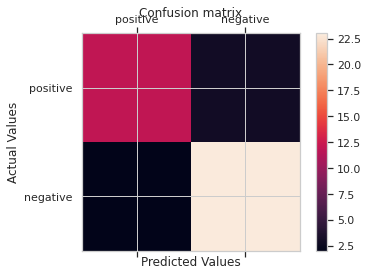

In [ ]:
labels = ['positive', 'negative']
cm = confusion_matrix(y_test, y_rbm_test_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# **eRBM ROC Curve**

AUC - in Test Set: 91.47%


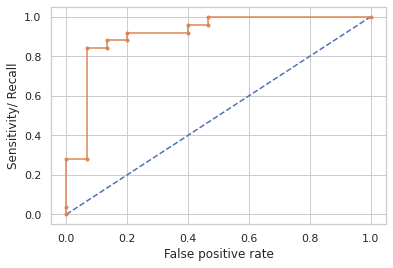

In [ ]:
# predict probabilities
probs = rbm_classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC - in Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr1, tpr1, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

# **Model Loss**

In [ ]:
#predict and compute logloss
pred = rbm_classifier.predict(X_test)
print(pred)

logloss = log_loss(y_test, probs, eps=1e-15, normalize=True, sample_weight=None, labels=None)
print("Logloss: %.2f" % (logloss))

[1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0
 1 0 1]
Logloss: 0.47


# **Actual Vs. Prediction Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



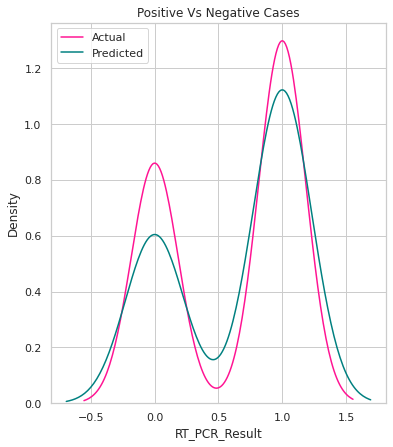

In [ ]:
import seaborn as sns
plt.figure(figsize=(6, 7))


ax = sns.distplot(y, hist=False, color="deeppink", label="Actual")
sns.distplot(y_rbm_test_pred, hist=False, color="teal", label="Predicted", ax=ax)


plt.title('Positive Vs Negative Cases')
plt.legend()

#save and display the plot 
#plt.savefig('C:\\Users\\Dell\\Desktop\\AV Plotting images\\matplotlib_plotting_11.png',dpi=300,bbox_inches='tight') 

plt.show()
plt.close()

# ***Model Interpretation Using SHapley Additive exPlanations (SHAP)***

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 5.2 MB/s 


In [ ]:
import shap

TypeError: ignored

In [ ]:
explainer = shap.KernelExplainer(, X)

TypeError: ignored

In [ ]:
final_model_shap_values = shap.KernelExplainer(final_model.predict,X_test)


In [ ]:
final_model_shap_values

print(final_model_shap_values.shap_values(X_test))

  0%|          | 0/40 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

[[-2.89907307e-03  1.44072579e-02  5.50966611e-02  2.31901384e-02
   8.43445128e-02 -4.29577515e-03  2.75211988e-02  3.92843233e-02
   1.02020908e-02 -7.48940183e-03  1.12135116e-02 -3.74969249e-02
   1.08874068e-01  1.16850333e-03  2.74897693e-03  4.61918081e-02
  -1.53943867e-03  2.40087630e-03  0.00000000e+00  2.07668636e-03]
 [-3.04102226e-02 -4.55207116e-02  2.02017164e-01 -5.87618287e-03
   6.34493784e-02  0.00000000e+00  3.30917224e-02 -6.01710098e-02
   1.12740805e-02  0.00000000e+00 -3.02936982e-02  2.06899154e-02
   6.82220585e-02  0.00000000e+00  1.36625889e-02  1.00087101e-01
  -9.65057590e-03  1.45511617e-02  1.14280734e-02  1.84491559e-02]
 [ 0.00000000e+00  7.32513703e-03  0.00000000e+00  0.00000000e+00
   9.61667321e-02  0.00000000e+00  2.00289744e-02  3.78725582e-02
  -4.36997916e-03  3.75001817e-02  6.39512823e-03  3.37280148e-02
   1.10644803e-01  2.22703670e-03  3.14874503e-03  2.43326684e-02
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.23

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


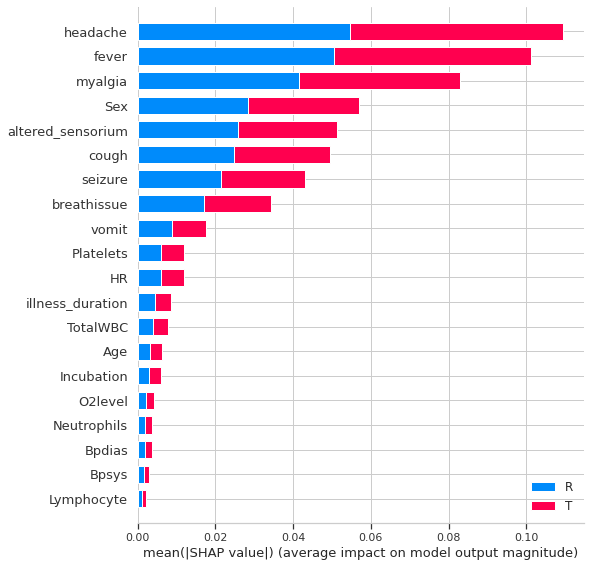

In [ ]:
#shap.summary_plot(final_model_shap_values, X_test.values)
shap.summary_plot(shap_values, X.values, plot_type="bar", class_names= 'RT_PCR_Result', feature_names = X.columns)

In [ ]:
# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

# displaying the first 5 rows of the shap values table
#pd.DataFrame(shap_values).head()

Expected Value: [0.42803062 0.57196938]


In [ ]:
i=4
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X.values[i], feature_names = X.columns)

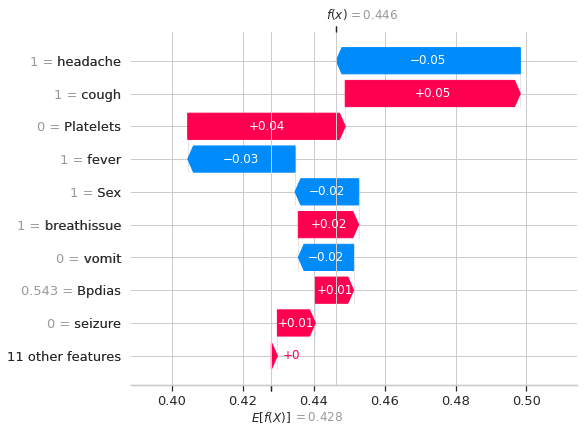

In [ ]:
row = 8
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[0], data=X_test.iloc[row],  
                                         feature_names=X.columns.tolist()))

In [ ]:
#Force Plot of the 2nd patient (row 1)

y_test[1]

0

*So we got to know that the First patient has a label 0 (False) which means the patient he/she Negative NiVD case. Now, we'll plot a Force plot to see what features push his income lower than $50k.*

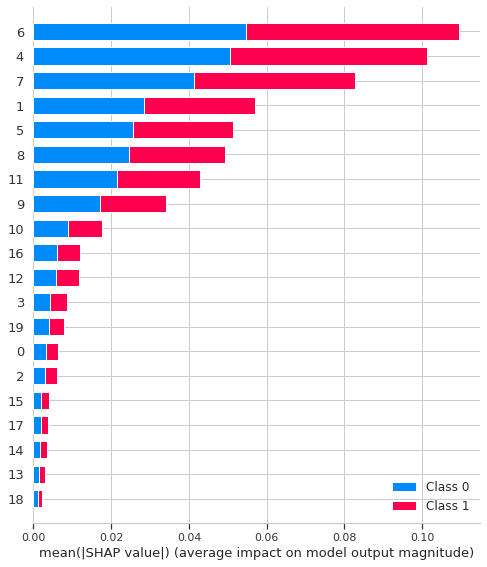

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X_test, plot_type="bar")

# ***_________________________________Model Comparison___________***

# SVM with RBM

In [ ]:
# Models we will use
#decision_tree = DecisionTreeClassifier()
rbm = BernoulliRBM(learning_rate=0.06, n_iter=500, random_state=0, verbose=True)

svm_classifier = Pipeline(steps=[('rbm', rbm), ('SVM', SVM_clf)])


rbm.learning_rate = 0.06
rbm.n_iter = 500
momentum_coefficient = 0.5 
weight_decay = 1e-4

rbm.n_components = 100
SVM_clf.C = 6000.0


st=time.time()

svm_classifier.fit(X_train, y_train)

et = time.time()
elapsed_time = (et-st)
print(f"Elapsed Time:",elapsed_time, 'seconds')
print("\n")


# Training Logistic regression

logistic_classifier = linear_model.LogisticRegression(C=100.0)
logistic_classifier.fit(X_train, y_train)

#rbm_final_prediction = rbm_classifier.predict(X_test)
#rbm_final_prediction


# Make predictions
y_train_pred = svm_classifier.predict(X_train)
y_test_pred = svm_classifier.predict(X_test)

# Training set performance
print('Training Accuracy')
svm_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
print(svm_train_accuracy)

print('Testing Accuracy')
svm_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
print(svm_test_accuracy)

svm_precision = metrics.precision_score(y_test, y_test_pred)
#print(svm_precision)
svm_recall = metrics.recall_score(y_test, y_test_pred)
#print(svm_recall)
svm_f1 = metrics.f1_score(y_test, y_test_pred)
#print(svm_f1)

print("SVM Classifier using RBM features:\n%s\n" % (
    metrics.classification_report(y_test, svm_classifier.predict(X_test))))

print("SVM Classifier using raw features:\n%s\n" % (
    metrics.classification_report(y_test, logistic_classifier.predict(X_test))))


[BernoulliRBM] Iteration 1, pseudo-likelihood = -18.97, time = 0.00s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -17.58, time = 0.01s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -17.71, time = 0.00s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -16.57, time = 0.00s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -16.62, time = 0.01s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -15.98, time = 0.00s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -15.07, time = 0.00s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -15.46, time = 0.00s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -15.02, time = 0.00s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -14.64, time = 0.00s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -15.00, time = 0.00s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -14.45, time = 0.00s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -14.70, time = 0.00s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -14.38, time = 0.00s
[BernoulliRBM] Iteration 15, 

AUC - in Test Set: 88.27%


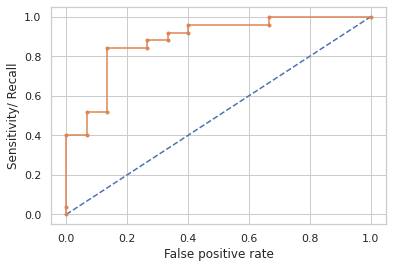

In [ ]:

# ROC 
# predict probabilities
probs = svm_classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

svm_auc = roc_auc_score(y_test, probs)
print('AUC - in Test Set: %.2f%%' % (svm_auc*100))

# calculate roc curve
fpr2, tpr2, thresholds2 = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr2, tpr2, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

# MLP with RBM

In [ ]:
# Models we will use
#decision_tree = DecisionTreeClassifier()
rbm = BernoulliRBM(random_state=0, verbose=True)

mlp_classifier = Pipeline(steps=[('rbm', rbm), ('MLP', classifier)])


rbm.learning_rate = 0.06
rbm.n_iter = 500
momentum_coefficient = 0.5 
weight_decay = 1e-4

rbm.n_components = 100
classifier.C = 6000.0


st=time.time()

mlp_classifier.fit(X_train, y_train)

et = time.time()
elapsed_time = (et-st)
print(f"Elapsed Time:",elapsed_time, 'seconds')
print("\n")


# Training Logistic regression

logistic_classifier = linear_model.LogisticRegression(C=100.0)
logistic_classifier.fit(X_train, y_train)

#rbm_final_prediction = rbm_classifier.predict(X_test)
#rbm_final_prediction


# Make predictions
y_train_pred = mlp_classifier.predict(X_train)
y_test_pred = mlp_classifier.predict(X_test)

# Training set performance
print('Training Accuracy')
mlp_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
print(mlp_train_accuracy)

print('Testing Accuracy')
mlp_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
print(mlp_test_accuracy)

mlp_precision = metrics.precision_score(y_test, y_test_pred)
#print(mlp_precision)
mlp_recall = metrics.recall_score(y_test, y_test_pred)
#print(mlp_recall)
mlp_f1 = metrics.f1_score(y_test, y_test_pred)
#print(mlp_f1)

print("MLP Classifier using RBM features:\n%s\n" % (
    metrics.classification_report(y_test, mlp_classifier.predict(X_test))))

print("MLP using raw features:\n%s\n" % (
    metrics.classification_report(y_test, logistic_classifier.predict(X_test))))

[BernoulliRBM] Iteration 1, pseudo-likelihood = -18.97, time = 0.00s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -17.58, time = 0.00s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -17.71, time = 0.00s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -16.57, time = 0.00s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -16.62, time = 0.00s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -15.98, time = 0.00s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -15.07, time = 0.00s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -15.46, time = 0.00s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -15.02, time = 0.00s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -14.64, time = 0.00s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -15.00, time = 0.00s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -14.45, time = 0.00s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -14.70, time = 0.00s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -14.38, time = 0.00s
[BernoulliRBM] Iteration 15, 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



AUC - in Test Set: 87.20%


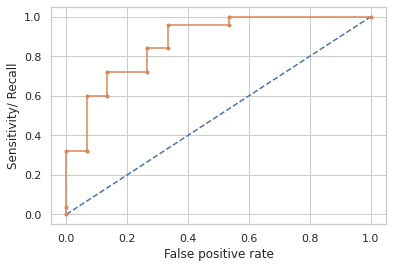

In [ ]:
# ROC 
# predict probabilities
probs = mlp_classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

mlp_auc = roc_auc_score(y_test, probs)
print('AUC - in Test Set: %.2f%%' % (mlp_auc*100))

# calculate roc curve
fpr3, tpr3, thresholds3 = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr3, tpr3, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

# KNN with RBM

In [ ]:
# Models we will use
#decision_tree = DecisionTreeClassifier()
rbm = BernoulliRBM(random_state=0, verbose=True)

knn_classifier = Pipeline(steps=[('rbm', rbm), ('KNN', model)])


rbm.learning_rate = 0.06
rbm.n_iter = 500
momentum_coefficient = 0.5 
weight_decay = 1e-4

rbm.n_components = 100
model.C = 6000.0


st=time.time()

knn_classifier.fit(X_train, y_train)

et = time.time()
elapsed_time = (et-st)
print(f"Elapsed Time:",elapsed_time, 'seconds')
print("\n")


# Training Logistic regression

logistic_classifier = linear_model.LogisticRegression(C=100.0)
logistic_classifier.fit(X_train, y_train)

#rbm_final_prediction = rbm_classifier.predict(X_test)
#rbm_final_prediction


# Make predictions
y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

# Training set performance
print('Training Accuracy')
knn_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
print(knn_train_accuracy)

print('Testing Accuracy')
knn_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
print(knn_test_accuracy)

knn_precision = metrics.precision_score(y_test, y_test_pred)
#print(knn_precision)
knn_recall = metrics.recall_score(y_test, y_test_pred)
#print(knn_recall)
knn_f1 = metrics.f1_score(y_test, y_test_pred)
#print(knn_f1)



print("KNN Classifier using RBM features:\n%s\n" % (
    metrics.classification_report(y_test, knn_classifier.predict(X_test))))

print("KNN Classifier using raw features:\n%s\n" % (
    metrics.classification_report(y_test, logistic_classifier.predict(X_test))))

[BernoulliRBM] Iteration 1, pseudo-likelihood = -18.97, time = 0.00s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -17.58, time = 0.01s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -17.71, time = 0.00s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -16.57, time = 0.00s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -16.62, time = 0.00s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -15.98, time = 0.00s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -15.07, time = 0.00s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -15.46, time = 0.00s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -15.02, time = 0.00s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -14.64, time = 0.00s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -15.00, time = 0.00s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -14.45, time = 0.00s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -14.70, time = 0.00s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -14.38, time = 0.00s
[BernoulliRBM] Iteration 15, 

AUC - in Test Set: 74.53%


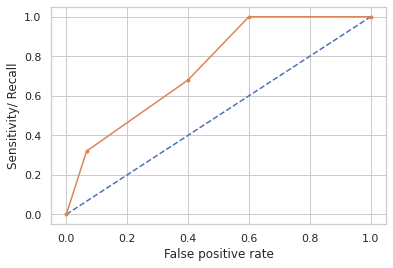

In [ ]:

# ROC 
# predict probabilities
probs = knn_classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

knn_auc = roc_auc_score(y_test, probs)
print('AUC - in Test Set: %.2f%%' % (knn_auc*100))

# calculate roc curve
fpr4, tpr4, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr4, tpr4, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

# Decision Tree with RBM

In [ ]:
# Models we will use
#decision_tree = DecisionTreeClassifier()
rbm = BernoulliRBM(random_state=0, verbose=True)

DT_classifier = Pipeline(steps=[('rbm', rbm), ('DT', dt_classifier)])


rbm.learning_rate = 0.06
rbm.n_iter = 500
momentum_coefficient = 0.5 
weight_decay = 1e-4

rbm.n_components = 100
dt_classifier.C = 6000.0


st=time.time()

DT_classifier.fit(X_train, y_train)

et = time.time()
elapsed_time = (et-st)
print(f"Elapsed Time:",elapsed_time, 'seconds')
print("\n")


# Training Logistic regression

logistic_classifier = linear_model.LogisticRegression(C=100.0)
logistic_classifier.fit(X_train, y_train)

#rbm_final_prediction = rbm_classifier.predict(X_test)
#rbm_final_prediction


# Make predictions
y_train_pred = DT_classifier.predict(X_train)
y_test_pred = DT_classifier.predict(X_test)

# Training set performance
print('Training Accuracy')
DT_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
print(DT_train_accuracy)


print('Testing Accuracy')
DT_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
print(DT_test_accuracy)
DT_precision = metrics.precision_score(y_test, y_test_pred)
#print(DT_precision)
DT_recall = metrics.recall_score(y_test, y_test_pred)
#print(DT_recall)
DT_f1 = metrics.f1_score(y_test, y_test_pred)
#print(DT_f1)

print("Decision Tree Classifier using RBM features:\n%s\n" % (
    metrics.classification_report(y_test, DT_classifier.predict(X_test))))

print("Decision Tree Classifier using raw features:\n%s\n" % (
    metrics.classification_report(y_test, logistic_classifier.predict(X_test))))

[BernoulliRBM] Iteration 1, pseudo-likelihood = -18.97, time = 0.00s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -17.58, time = 0.00s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -17.71, time = 0.00s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -16.57, time = 0.00s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -16.62, time = 0.00s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -15.98, time = 0.00s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -15.07, time = 0.00s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -15.46, time = 0.00s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -15.02, time = 0.00s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -14.64, time = 0.01s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -15.00, time = 0.00s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -14.45, time = 0.00s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -14.70, time = 0.00s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -14.38, time = 0.00s
[BernoulliRBM] Iteration 15, 

AUC - in Test Set: 86.67%


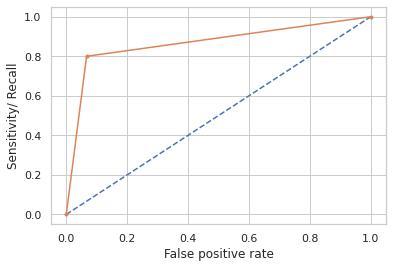

In [ ]:

# ROC 
# predict probabilities
probs = DT_classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

DT_auc = roc_auc_score(y_test, probs)
print('AUC - in Test Set: %.2f%%' % (DT_auc*100))

# calculate roc curve
fpr5, tpr5, thresholds5 = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr5, tpr5, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

# **Results**

In [ ]:
print('RBM with SVM')
print('Accuracy =',svm_test_accuracy*100)
print('Precision =',svm_precision*100)
print('Recall =',svm_recall*100)
print('F1 Score =',svm_f1*100)
print('\n')

print('RBM with MLP')
print('Accuracy =',mlp_test_accuracy*100)
print('Precision =',mlp_precision*100)
print('Recall =',mlp_recall*100)
print('F1 Score =',mlp_f1*100)
print('\n')

print('RBM with KNN')
print('Accuracy =',knn_test_accuracy*100)
print('Precision =',knn_precision*100)
print('Recall =',knn_recall*100)
print('F1 Score =',knn_f1*100)
print('\n')

print('RBM with Decision Tree')
print('Accuracy =',DT_test_accuracy*100)
print('Precision =',DT_precision*100)
print('Recall =',DT_recall*100)
print('F1 Score =',DT_f1*100)
print('\n')

print('RBM with Proposed Stacking Classifier')
print('Accuracy =',rbm_test_accuracy*100)
print('Precision =',rbm_precision*100)
print('Recall =',rbm_recall*100)
print('F1 Score =',rbm_f1*100)
print('\n')

RBM with SVM
Accuracy = 80.0
Precision = 79.3103448275862
Recall = 92.0
F1 Score = 85.18518518518519


RBM with MLP
Accuracy = 80.0
Precision = 84.0
Recall = 84.0
F1 Score = 83.99999999999999


RBM with KNN
Accuracy = 65.0
Precision = 73.91304347826086
Recall = 68.0
F1 Score = 70.83333333333334


RBM with Decision Tree
Accuracy = 85.0
Precision = 95.23809523809523
Recall = 80.0
F1 Score = 86.95652173913044


RBM with Proposed Stacking Classifier
Accuracy = 87.5
Precision = 88.46153846153845
Recall = 92.0
F1 Score = 90.19607843137256




In [ ]:
import plotly.graph_objects as go
Models=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC']

fig = go.Figure(data=[
    go.Bar(name='SVM-RBM', marker_color='#EF553B', x=Models, y=[80.0, 79.3, 92.0, 85.1, 88.27]),
    go.Bar(name='MLP-RBM', marker_color='#00CC96', x=Models, y=[80.0, 84.0, 84.0, 83.9, 87.20]),
    go.Bar(name='KNN-RBM', marker_color='#FECB52', x=Models, y=[65.0, 73.9, 68.0, 70.8, 74.53]),
    go.Bar(name='DT-RBM', marker_color='#FFA15A', x=Models, y=[85.0, 95.2, 80.0, 86.9, 86.6]),
    go.Bar(name='ERBM (Proposed)', marker_color='#FF6692', x=Models, y=[87.5, 88.4, 92.0, 90.1, 90.67])
])
# Change the bar mode
fig.update_layout(barmode='group')


fig.update_layout(
    title="------------------------------------------------------------------- *Model Comparison* -------------------------------------------------------------------",
    xaxis_title="ML Perfomance Metrics",
    yaxis_title="Entropy level of the ML model",
    legend_title="Models (Classifiers)",
    font=dict(
        family="Gabriola, monospace",
        size=18,
        color="darkblue"
    )
)


fig.show()

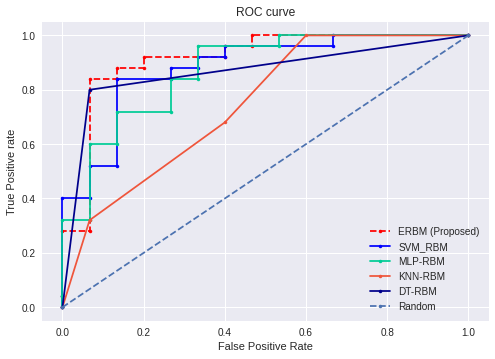

In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, marker='.', linestyle='--', color='red', label='ERBM (Proposed)')
plt.plot(fpr2, tpr2, marker='.', color='blue', label='SVM_RBM')
plt.plot(fpr3, tpr3, marker='.', color='#00CC96', label='MLP-RBM')
plt.plot(fpr4, tpr4, marker='.', color='#EF553B', label='KNN-RBM')
plt.plot(fpr5, tpr5, marker='.', color='darkblue', label='DT-RBM')
plt.plot([0, 1], [0, 1], marker='.', linestyle='--', label='Random')

#plt.plot(fpr1, tpr1, linestyle='--', color='black')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()